## data import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
import seaborn as sns
import datetime as dt
import matplotlib.font_manager as fm
import random

from matplotlib import gridspec
from scipy import stats

In [2]:
# BASE_DIR = Path(__name__).resolve().parent.parent
FILES_DIR = '../files/'
bidding_df = pd.read_csv(FILES_DIR + 'bidding_results.csv')

In [227]:
fm.get_fontconfig_fonts()
font_location = 'C:\\WINDOWS\\Fonts\\malgun.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_5696\2582751676.py:1: MatplotlibDeprecationWarning: 
The get_fontconfig_fonts function was deprecated in Matplotlib 3.5 and will be removed two minor releases later.
  fm.get_fontconfig_fonts()


In [3]:
bidding = bidding_df.copy()

In [4]:
# column describe 
def descriptive_info(bidding):
    number_of_cells = bidding.count(axis=0, level=None, numeric_only=False)
    print('Total number of cells the datafile has: \n' + str(number_of_cells))
    print('\n')
    print('Printing descriptive statistics...\n\n', bidding.describe())

descriptive_info(bidding)

Total number of cells the datafile has: 
index              1337088
Impression         1337088
Click              1337088
Cost               1337088
Sum of AD rank     1337078
Bid                1337088
Price(PC)          1337088
Price(Mobile)      1337088
Delivery Fee       1337088
Category Name 1    1337088
Category Name 2    1337088
Category Name 3    1331221
Category Name 4     930132
date               1337088
dtype: int64


Printing descriptive statistics...

               index    Impression         Click          Cost  Sum of AD rank  \
count  1.337088e+06  1.337088e+06  1.337088e+06  1.337088e+06    1.337078e+06   
mean   5.167098e+06  4.412753e+01  7.189467e-01  1.800053e+02    1.138271e+01   
std    2.655813e+06  3.434510e+02  3.423456e+00  1.772706e+03    1.323231e+01   
min    2.578600e+04  0.000000e+00  0.000000e+00  0.000000e+00    1.000000e+00   
25%    3.300168e+06  3.000000e+00  0.000000e+00  0.000000e+00    3.706897e+00   
50%    4.637081e+06  1.000000e+01  0.000000

In [5]:
# bidding 날짜 datetime으로 만들기
def _trans_date_time(bidding):
    bidding.index = pd.to_datetime(bidding['date'], format='%Y%m%d')
    bidding.drop('date', axis=1, inplace=True)
    return bidding

_trans_date_time(bidding)

,index,Impression,Click,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4
date,,,,,,,,,,,,,
2022-10-31,3575092,3,0,0.0,3.000000,50,165900,165900,0,가구/인테리어,침실가구,장롱/붙박이장,드레스룸
2022-10-31,3575637,6,0,0.0,3.333333,50,10900,10900,0,가구/인테리어,인테리어소품,아로마/캔들용품,아로마방향제/디퓨저
2022-10-31,4129259,7,0,0.0,8.000000,50,255000,255000,-1,가구/인테리어,거실가구,소파,패브릭소파
2022-10-31,4131479,36,3,150.0,4.416667,140,190000,190000,20000,가구/인테리어,아동/주니어가구,책상의자세트,NaN
2022-10-31,4131482,224,0,0.0,5.696429,50,129000,129000,0,가구/인테리어,아동/주니어가구,책상,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-03,2566795,5,0,0.0,13.200000,500,19900,19900,0,가구/인테리어,인테리어소품,아로마/캔들용품,아로마방향제/디퓨저
2023-01-03,2566880,3,0,0.0,17.000000,500,23900,23900,3000,생활/건강,문구/사무용품,이벤트/파티용품,데코용품
2023-01-03,2566881,1,0,0.0,8.000000,500,2500,2500,3000,가구/인테리어,인테리어소품,기타장식용품,NaN


In [6]:
# CTR = 클릭률
# CPC = 클릭당 비용
# CPM = 1000회 노출당 비용
# Sum of AD rank = 반올림
bidding["CTR"] = (bidding["Click"]/bidding["Impression"]) * 100
bidding["CPC"] = (bidding["Cost"]/bidding["Click"])
bidding["CPM"] = (bidding["Cost"]/1000)
bidding['Sum of AD rank'] = bidding['Sum of AD rank'].round(0)

In [7]:
bidding_drop_null = bidding.copy()
bidding_drop_null['Category Name 4'].fillna('null_cat4', inplace = True)
bidding_drop_null['CPC'].fillna(0, inplace = True)
bidding_drop_null.dropna(axis = 0, inplace = True)
print(bidding_drop_null.isnull().sum().sort_values(ascending=False)) # null값 퍼센트로 표현

index              0
Impression         0
Click              0
Cost               0
Sum of AD rank     0
Bid                0
Price(PC)          0
Price(Mobile)      0
Delivery Fee       0
Category Name 1    0
Category Name 2    0
Category Name 3    0
Category Name 4    0
CTR                0
CPC                0
CPM                0
dtype: int64


In [8]:
bidding_drop_null

,index,Impression,Click,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,CTR,CPC,CPM
date,,,,,,,,,,,,,,,,
2022-10-31,3575092,3,0,0.0,3.0,50,165900,165900,0,가구/인테리어,침실가구,장롱/붙박이장,드레스룸,0.000000,0.0,0.00
2022-10-31,3575637,6,0,0.0,3.0,50,10900,10900,0,가구/인테리어,인테리어소품,아로마/캔들용품,아로마방향제/디퓨저,0.000000,0.0,0.00
2022-10-31,4129259,7,0,0.0,8.0,50,255000,255000,-1,가구/인테리어,거실가구,소파,패브릭소파,0.000000,0.0,0.00
2022-10-31,4131479,36,3,150.0,4.0,140,190000,190000,20000,가구/인테리어,아동/주니어가구,책상의자세트,null_cat4,8.333333,50.0,0.15
2022-10-31,4131482,224,0,0.0,6.0,50,129000,129000,0,가구/인테리어,아동/주니어가구,책상,null_cat4,0.000000,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-03,2566795,5,0,0.0,13.0,500,19900,19900,0,가구/인테리어,인테리어소품,아로마/캔들용품,아로마방향제/디퓨저,0.000000,0.0,0.00
2023-01-03,2566880,3,0,0.0,17.0,500,23900,23900,3000,생활/건강,문구/사무용품,이벤트/파티용품,데코용품,0.000000,0.0,0.00
2023-01-03,2566881,1,0,0.0,8.0,500,2500,2500,3000,가구/인테리어,인테리어소품,기타장식용품,null_cat4,0.000000,0.0,0.00


## price 구간별 cost 민감도에 따른 rank

In [81]:
price_down_5 = bidding_drop_null[bidding_drop_null['Price(PC)'] <= 50000]

price_5_10 = bidding_drop_null[(bidding_drop_null['Price(PC)'] > 50000) & (bidding_drop_null['Price(PC)'] < 100000)]

price_10_15 = bidding_drop_null[(bidding_drop_null['Price(PC)'] > 100000) & (bidding_drop_null['Price(PC)'] < 150000)]

price_15_20 = bidding_drop_null[(bidding_drop_null['Price(PC)'] > 150000) & (bidding_drop_null['Price(PC)'] < 200000)]

price_up_20 = bidding_drop_null[bidding_drop_null['Price(PC)'] >= 200000]

In [247]:
def price_Analysis(df):
        
    print('비용평균')
    print(df['Cost'].mean())
    print('-' * 50)
    print('\n')
    
    cost_non_zero = df[df['Cost'] != 0]
    
    
    print(f'코스트 썼을때 평균 순위 : {cost_non_zero["Sum of AD rank"].mean()}')

    cost_zero = df[df['Cost'] == 0]

    print(f'코스트 안 썼을때 평균 순위 : {cost_zero["Sum of AD rank"].mean()}')
    print('-' * 50)
    print('\n')
  

    print("광고숫자비율")
    print((len(list(set(df['index'].values))) / len(df))*100)
    print('-' * 50)
    print('\n')
    
    
    rank_del_zero = df[df['Delivery Fee'] <= 0]
    rank_del_non_zero = df[df['Delivery Fee'] > 0]
    print('배달비 없음 비율')
    print((rank_del_zero.shape[0] / df['Delivery Fee'].shape[0]*100))
    print('\n')
    print('배달비 있음 비율')
    print((rank_del_non_zero.shape[0] / df['Delivery Fee'].shape[0]*100))  
    print('-' * 50)
    print('\n')
    

    print('코스트비율')
    print(df['Cost'].value_counts(normalize=True))
    print('-' * 50)
    print('\n')
    
    plt.figure(figsize=(28, 12))
    plt.subplot(4, 1, 1)
    print('코스트')
    display(cost_non_zero['Cost'].describe())
    plt.hist(cost_non_zero['Cost'], bins=150)
    plt.title('cost_non_zero')
    plt.xticks(rotation=90)
    
    
    print('-' * 50)
    print('\n')
    
    
    plt.subplot(4, 1, 2)
    print('카테고리1')
    display(df['Category Name 1'].value_counts(normalize=True))
    sns.countplot(x=df['Category Name 1'], data=df)
    plt.title('Category Name 1')
    plt.xticks(rotation=90)
    
    
    print('-' * 50)
    print('\n')
    
    
    plt.subplot(4, 1, 3)
    print('코스트 있음 , 순위')
    display(cost_non_zero['Sum of AD rank'].describe())
    plt.hist(cost_non_zero['Sum of AD rank'], bins=20)
    plt.title('cost_non_zero')
    plt.xticks(rotation=90)
    
    
    print('-' * 50)
    print('\n')
    
    
    plt.subplot(4, 1, 4)
    print('코스트 없음 , 순위')
    display(cost_zero['Sum of AD rank'].describe())
    plt.hist(cost_zero['Sum of AD rank'], bins=20)
    plt.title('cost_zero')
    plt.xticks(rotation=90)

    

비용평균
167.93588821534985
--------------------------------------------------


코스트 썼을때 평균 순위 : 6.016281726651389
코스트 안 썼을때 평균 순위 : 13.595938592876688
--------------------------------------------------


광고숫자비율
3.817393147025583
--------------------------------------------------


배달비 없음 비율
40.053169629096885


배달비 있음 비율
59.946830370903115
--------------------------------------------------


코스트비율
0.0        0.759714
50.0       0.051079
100.0      0.017558
150.0      0.009390
200.0      0.006832
             ...   
11830.0    0.000002
8910.0     0.000002
13810.0    0.000002
12050.0    0.000002
9060.0     0.000002
Name: Cost, Length: 1739, dtype: float64
--------------------------------------------------


코스트


count    149677.000000
mean        698.900165
std        3549.896877
min          50.000000
25%          90.000000
50%         210.000000
75%         500.000000
max      246040.000000
Name: Cost, dtype: float64

--------------------------------------------------


카테고리1


가구/인테리어    0.506210
생활/건강      0.418395
출산/육아      0.026151
스포츠/레저     0.015037
패션잡화       0.012125
화장품/미용     0.010560
디지털/가전     0.007860
패션의류       0.003039
여가/생활편의    0.000372
식품         0.000250
Name: Category Name 1, dtype: float64

--------------------------------------------------


코스트 있음 , 순위


count    149677.000000
mean          6.016282
std           6.240327
min           1.000000
25%           2.000000
50%           4.000000
75%           7.000000
max          98.000000
Name: Sum of AD rank, dtype: float64

--------------------------------------------------


코스트 없음 , 순위


count    473235.000000
mean         13.595939
std          15.469840
min           1.000000
25%           4.000000
50%           8.000000
75%          16.000000
max         100.000000
Name: Sum of AD rank, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53580 (\N{HANGUL SYLLABLE TE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\s

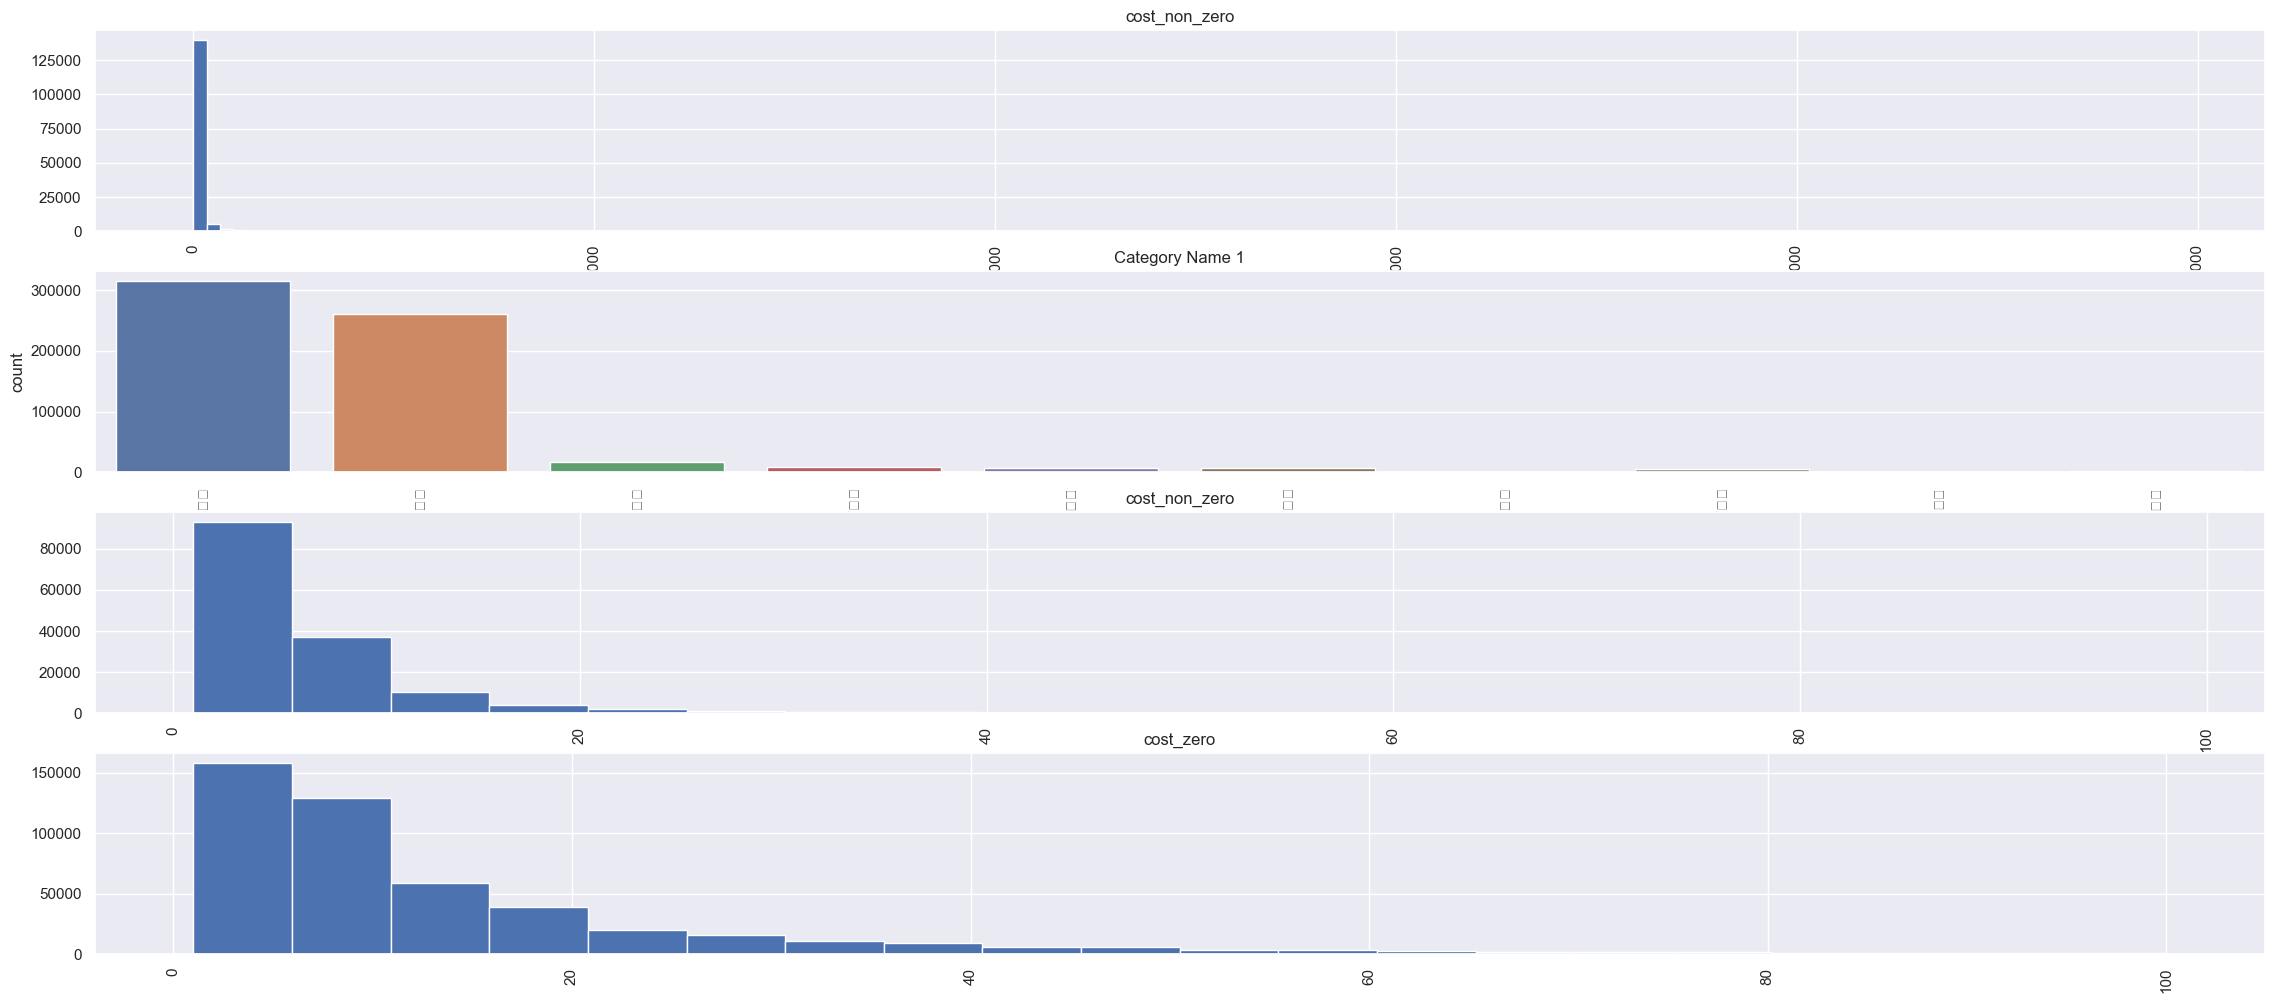

In [260]:
price_Analysis(price_down_5)

비용평균
169.75988080378508
--------------------------------------------------


코스트 썼을때 평균 순위 : 6.468736928072028
코스트 안 썼을때 평균 순위 : 13.20863936834374
--------------------------------------------------


광고숫자비율
3.7204414601536326
--------------------------------------------------


배달비 없음 비율
72.29230700919132


배달비 있음 비율
27.70769299080867
--------------------------------------------------


코스트비율
0.0        0.752318
50.0       0.051270
100.0      0.017238
150.0      0.008792
200.0      0.006478
             ...   
9010.0     0.000005
7370.0     0.000005
10850.0    0.000005
86540.0    0.000005
17610.0    0.000005
Name: Cost, Length: 1053, dtype: float64
--------------------------------------------------


코스트


count     50203.000000
mean        685.393303
std        3481.783996
min          50.000000
25%          90.000000
50%         230.000000
75%         500.000000
max      325300.000000
Name: Cost, dtype: float64

--------------------------------------------------


카테고리1


가구/인테리어    0.803943
생활/건강      0.147180
출산/육아      0.022744
스포츠/레저     0.016912
화장품/미용     0.003602
디지털/가전     0.002309
여가/생활편의    0.001495
패션의류       0.000878
패션잡화       0.000671
식품         0.000266
Name: Category Name 1, dtype: float64

--------------------------------------------------


코스트 있음 , 순위


count    50203.000000
mean         6.468737
std          6.288642
min          1.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         98.000000
Name: Sum of AD rank, dtype: float64

--------------------------------------------------


코스트 없음 , 순위


count    152488.000000
mean         13.208639
std          14.539568
min           1.000000
25%           4.000000
50%           8.000000
75%          16.000000
max         100.000000
Name: Sum of AD rank, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53580 (\N{HANGUL SYLLABLE TE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\s

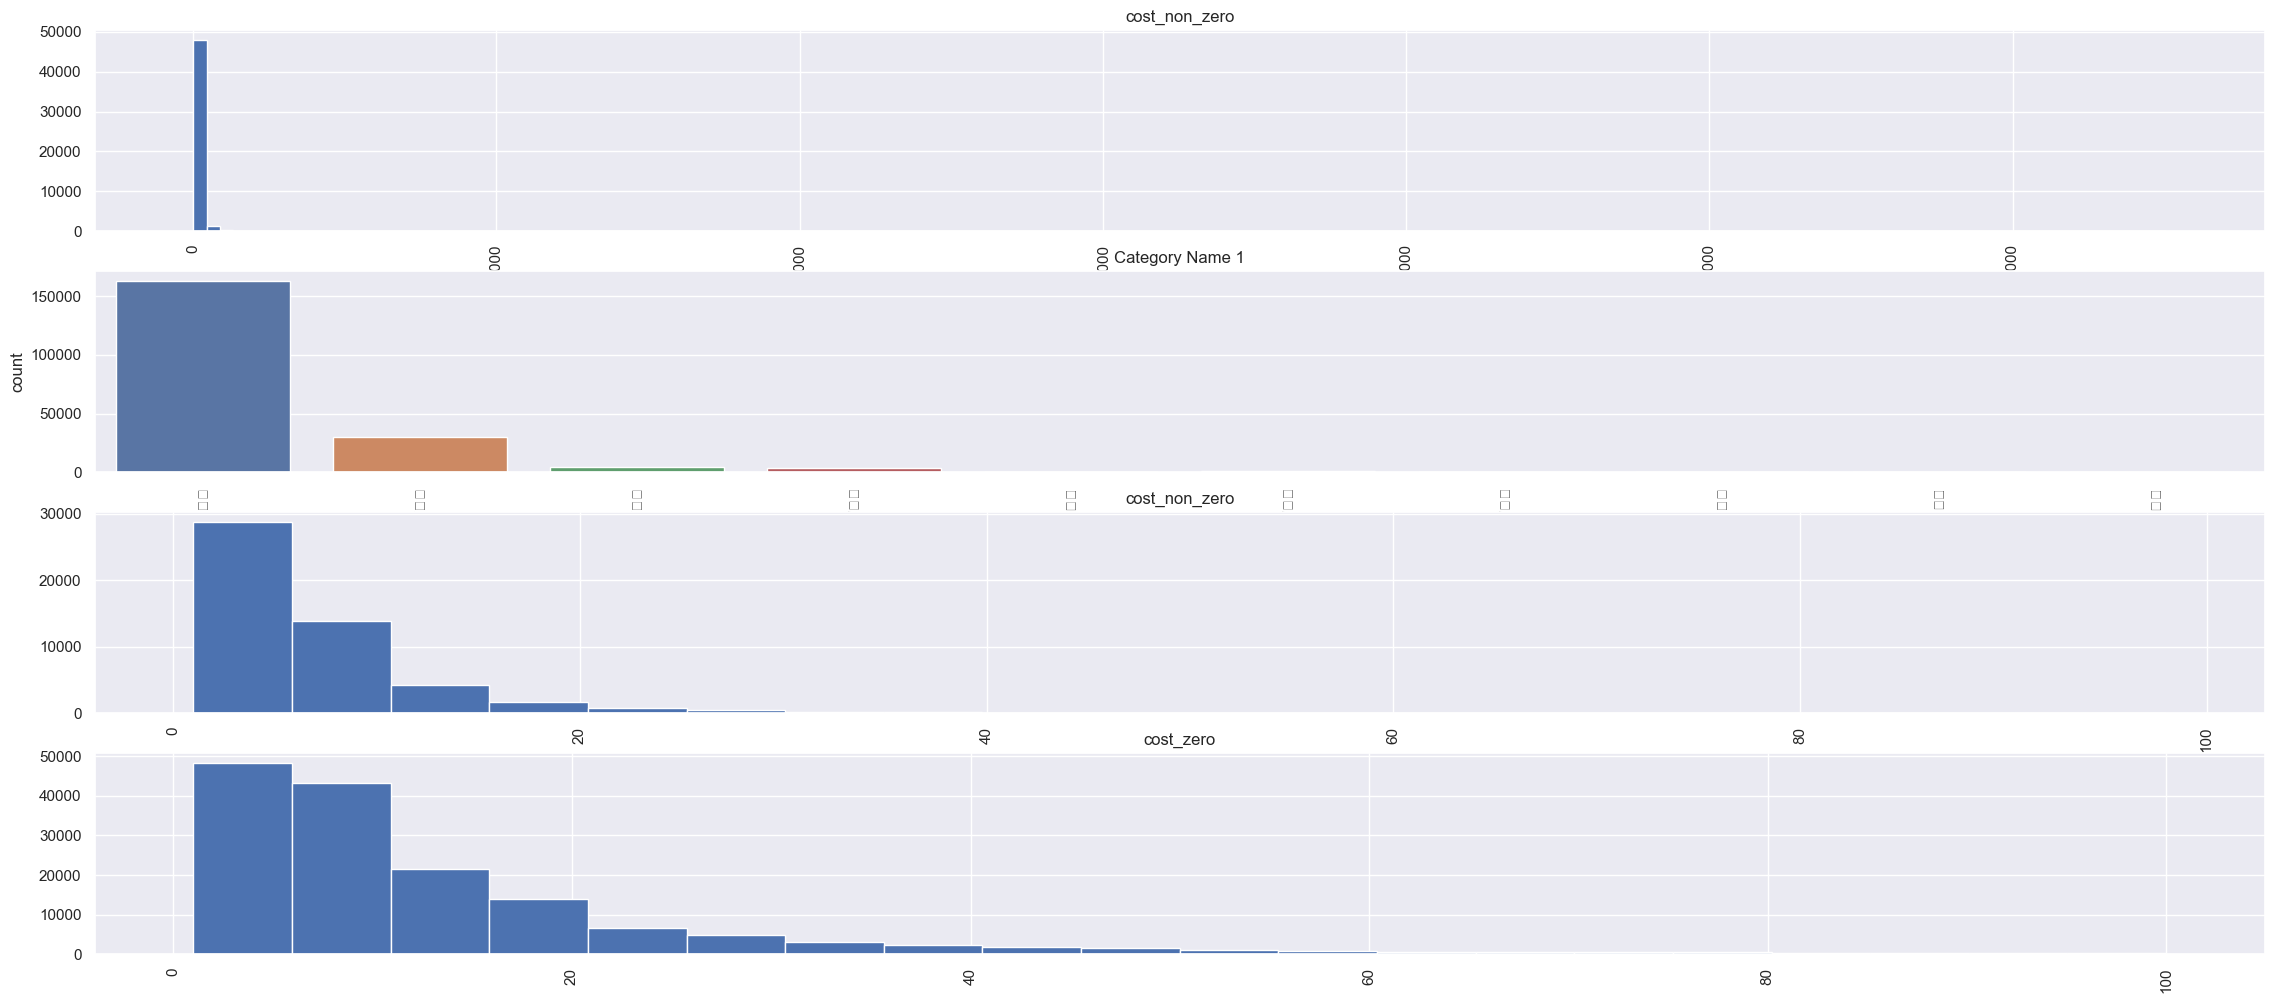

In [261]:
price_Analysis(price_5_10)

비용평균
176.7522275674545
--------------------------------------------------


코스트 썼을때 평균 순위 : 6.805257416335293
코스트 안 썼을때 평균 순위 : 13.58261623567634
--------------------------------------------------


광고숫자비율
3.8761765321062542
--------------------------------------------------


배달비 없음 비율
86.22798577703409


배달비 있음 비율
13.772014222965906
--------------------------------------------------


코스트비율
0.0        0.762251
50.0       0.042836
100.0      0.014097
150.0      0.007956
200.0      0.005806
             ...   
6180.0     0.000008
7770.0     0.000008
28530.0    0.000008
14250.0    0.000008
26380.0    0.000008
Name: Cost, Length: 855, dtype: float64
--------------------------------------------------


코스트


count     28417.000000
mean        743.439139
std        3118.644716
min          50.000000
25%         100.000000
50%         260.000000
75%         580.000000
max      185690.000000
Name: Cost, dtype: float64

--------------------------------------------------


카테고리1


가구/인테리어    0.886785
생활/건강      0.082041
출산/육아      0.013587
스포츠/레저     0.012039
디지털/가전     0.001824
여가/생활편의    0.001732
패션의류       0.001723
화장품/미용     0.000167
패션잡화       0.000100
Name: Category Name 1, dtype: float64

--------------------------------------------------


코스트 있음 , 순위


count    28417.000000
mean         6.805257
std          6.476787
min          1.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         93.000000
Name: Sum of AD rank, dtype: float64

--------------------------------------------------


코스트 없음 , 순위


count    91108.000000
mean        13.582616
std         14.520047
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max        100.000000
Name: Sum of AD rank, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53580 (\N{HANGUL SYLLABLE TE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\s

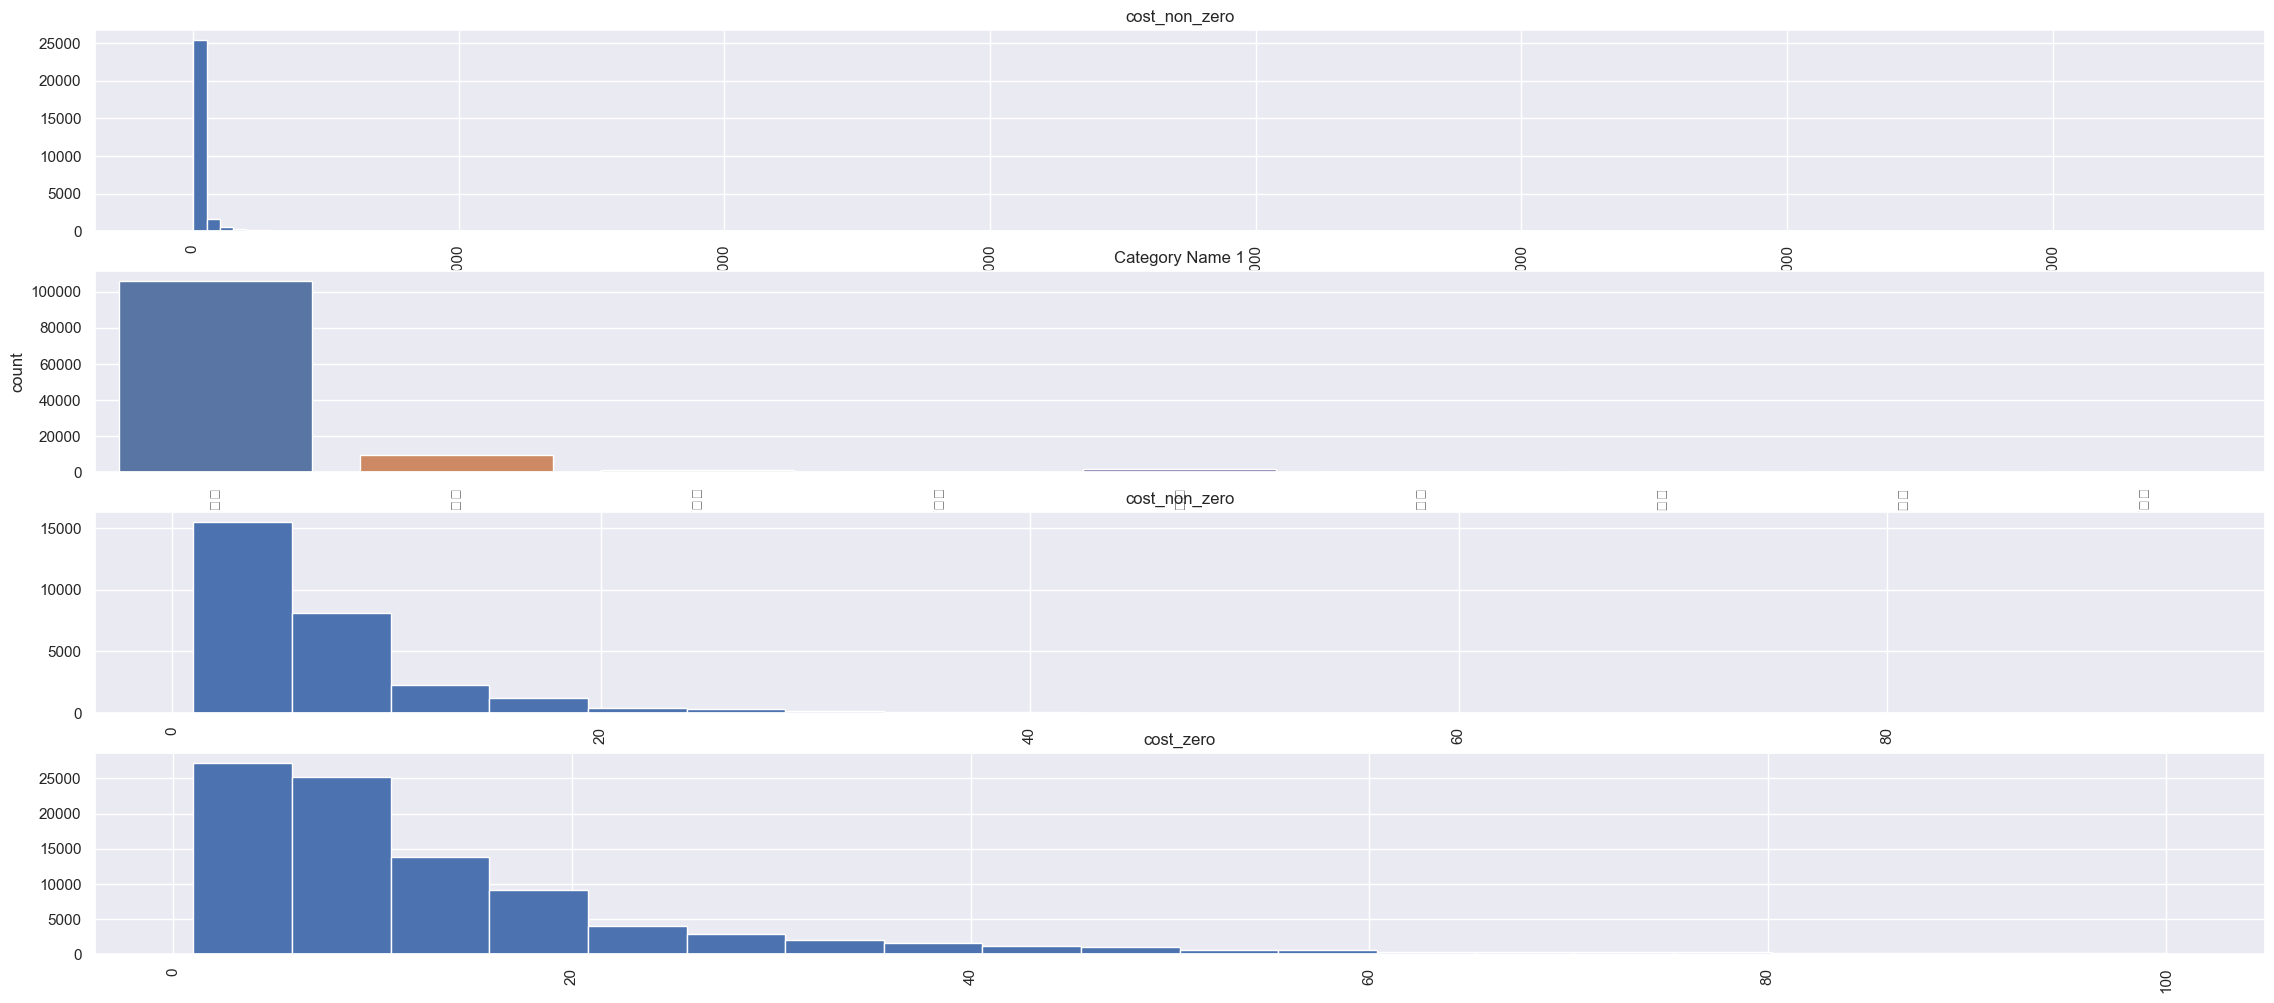

In [262]:
price_Analysis(price_10_15)

비용평균
203.27396972012716
--------------------------------------------------


코스트 썼을때 평균 순위 : 6.766107397808393
코스트 안 썼을때 평균 순위 : 13.122434039064101
--------------------------------------------------


광고숫자비율
3.8054734137400184
--------------------------------------------------


배달비 없음 비율
88.89368818597644


배달비 있음 비율
11.106311814023547
--------------------------------------------------


코스트비율
0.0         0.756421
50.0        0.045453
100.0       0.014210
150.0       0.007199
350.0       0.006490
              ...   
6950.0      0.000011
117480.0    0.000011
23020.0     0.000011
9760.0      0.000011
3110.0      0.000011
Name: Cost, Length: 754, dtype: float64
--------------------------------------------------


코스트


count     21993.000000
mean        834.529623
std        4027.003254
min          50.000000
25%         100.000000
50%         260.000000
75%         600.000000
max      191400.000000
Name: Cost, dtype: float64

--------------------------------------------------


카테고리1


가구/인테리어    0.931732
생활/건강      0.053505
출산/육아      0.007509
스포츠/레저     0.005117
여가/생활편의    0.000986
패션의류       0.000598
화장품/미용     0.000365
패션잡화       0.000144
디지털/가전     0.000044
Name: Category Name 1, dtype: float64

--------------------------------------------------


코스트 있음 , 순위


count    21993.000000
mean         6.766107
std          6.462560
min          1.000000
25%          3.000000
50%          5.000000
75%          8.000000
max        100.000000
Name: Sum of AD rank, dtype: float64

--------------------------------------------------


코스트 없음 , 순위


count    68298.000000
mean        13.122434
std         13.854315
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max        100.000000
Name: Sum of AD rank, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53580 (\N{HANGUL SYLLABLE TE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\s

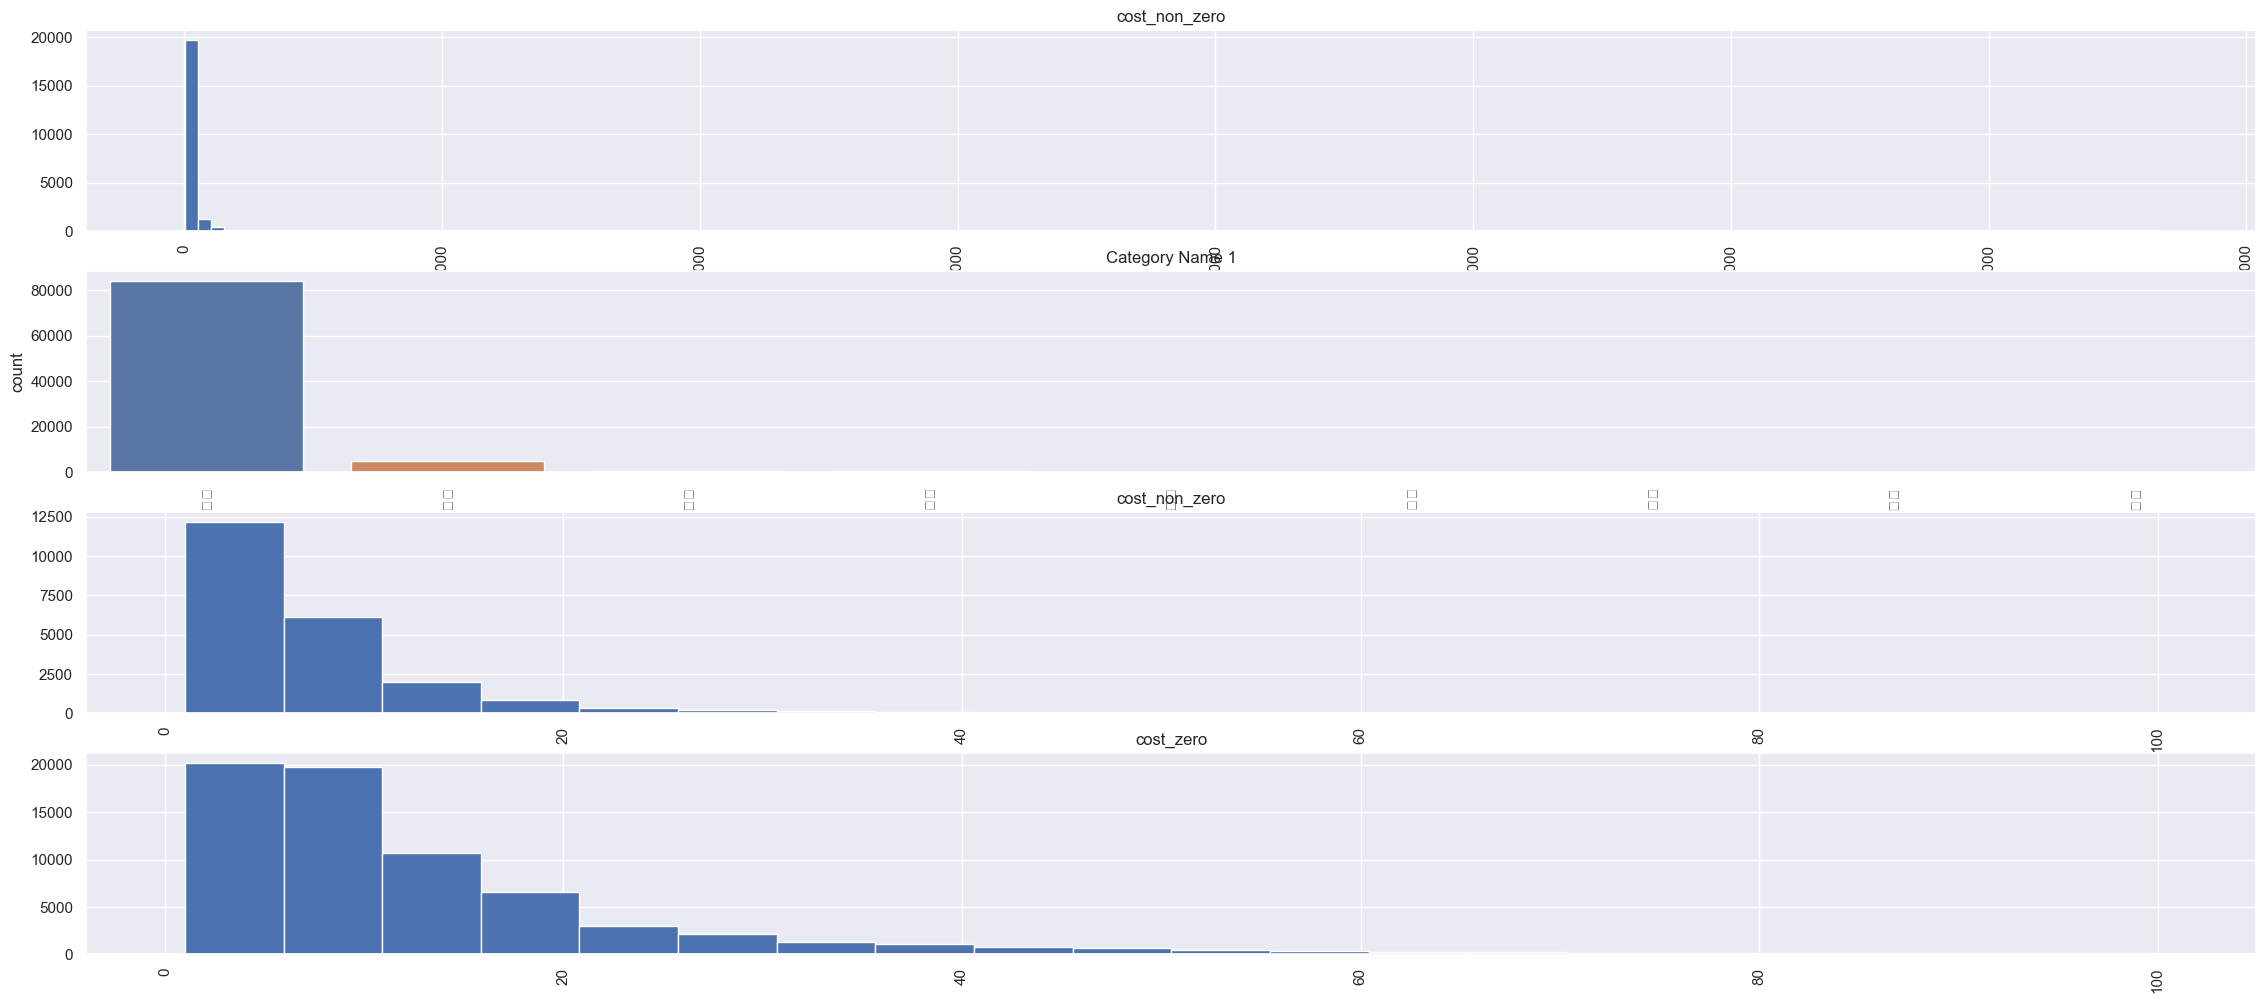

In [263]:
price_Analysis(price_15_20)

비용평균
210.7346578608049
--------------------------------------------------


코스트 썼을때 평균 순위 : 5.929048201365536
코스트 안 썼을때 평균 순위 : 11.781710983415701
--------------------------------------------------


광고숫자비율
3.52382678765036
--------------------------------------------------


배달비 없음 비율
94.177460231684


배달비 있음 비율
5.822539768315998
--------------------------------------------------


코스트비율
0.0        0.731501
50.0       0.049114
100.0      0.017539
150.0      0.009433
250.0      0.007059
             ...   
27480.0    0.000003
17020.0    0.000003
14300.0    0.000003
13070.0    0.000003
15800.0    0.000003
Name: Cost, Length: 1293, dtype: float64
--------------------------------------------------


코스트


count     78504.000000
mean        784.862045
std        3460.629939
min          50.000000
25%         100.000000
50%         260.000000
75%         600.000000
max      259530.000000
Name: Cost, dtype: float64

--------------------------------------------------


카테고리1


가구/인테리어    0.966417
생활/건강      0.022611
출산/육아      0.005876
스포츠/레저     0.004046
디지털/가전     0.000506
화장품/미용     0.000363
패션잡화       0.000157
여가/생활편의    0.000024
Name: Category Name 1, dtype: float64

--------------------------------------------------


코스트 있음 , 순위


count    78504.000000
mean         5.929048
std          5.287349
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         90.000000
Name: Sum of AD rank, dtype: float64

--------------------------------------------------


코스트 없음 , 순위


count    213877.000000
mean         11.781711
std          12.016993
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         100.000000
Name: Sum of AD rank, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53580 (\N{HANGUL SYLLABLE TE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\s

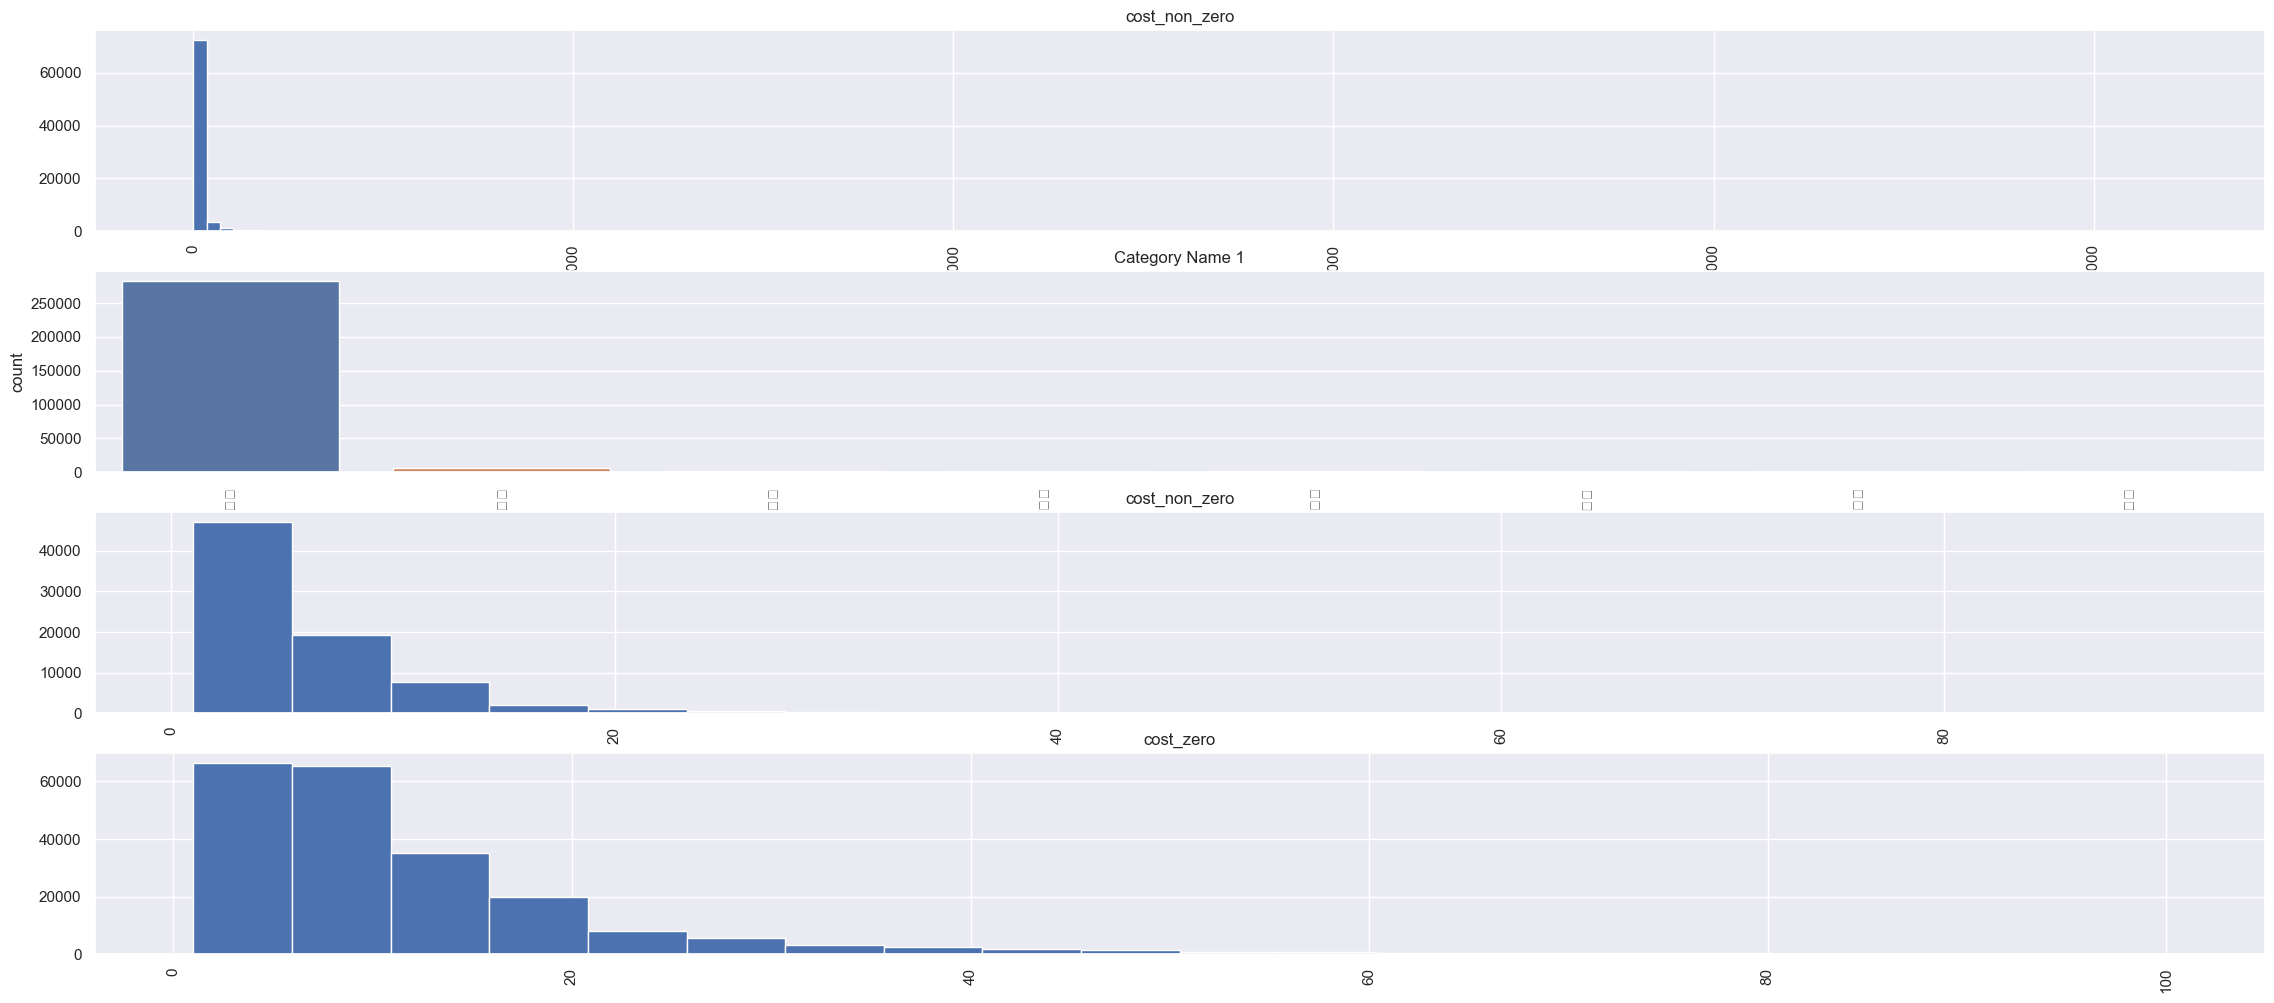

In [264]:
price_Analysis(price_up_20)

In [174]:
def corr_heat(df):
    sns.set(rc = {'figure.figsize':(15,8)}, font_scale = 1)
    sns.heatmap(data = df.corr(), annot=True, linewidths=1)

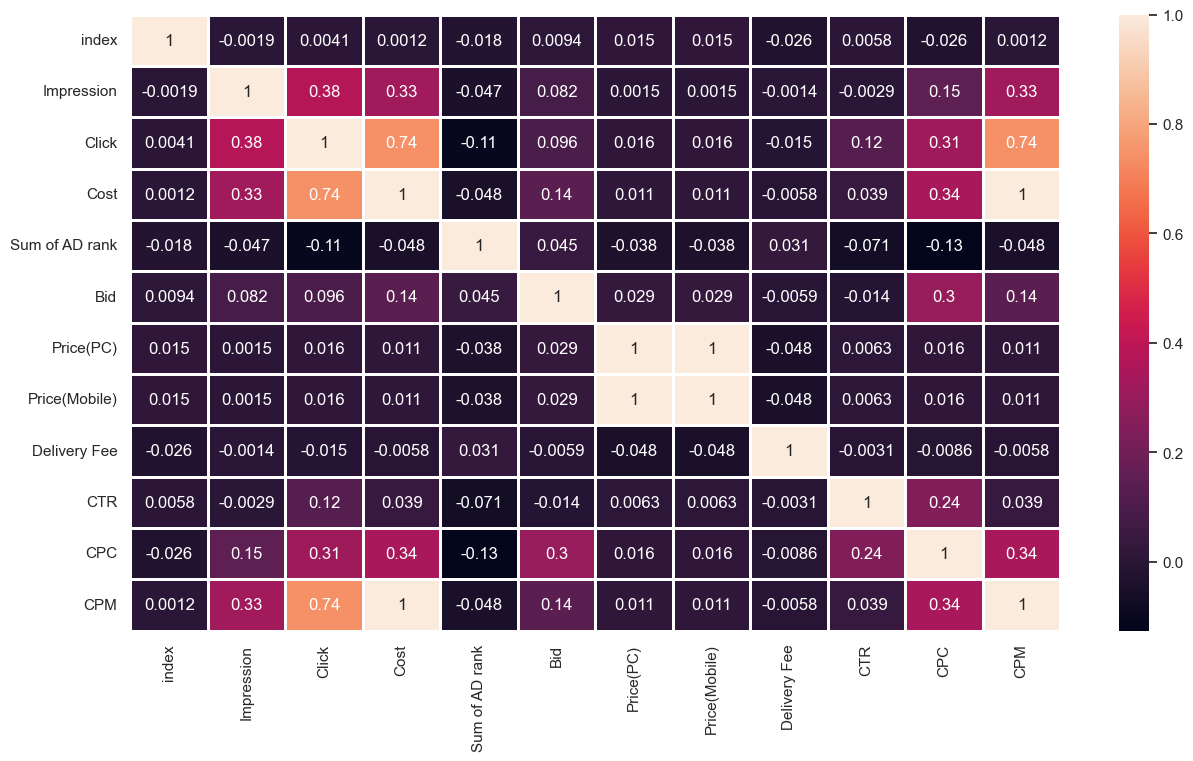

In [175]:
corr_heat(price_down_5)

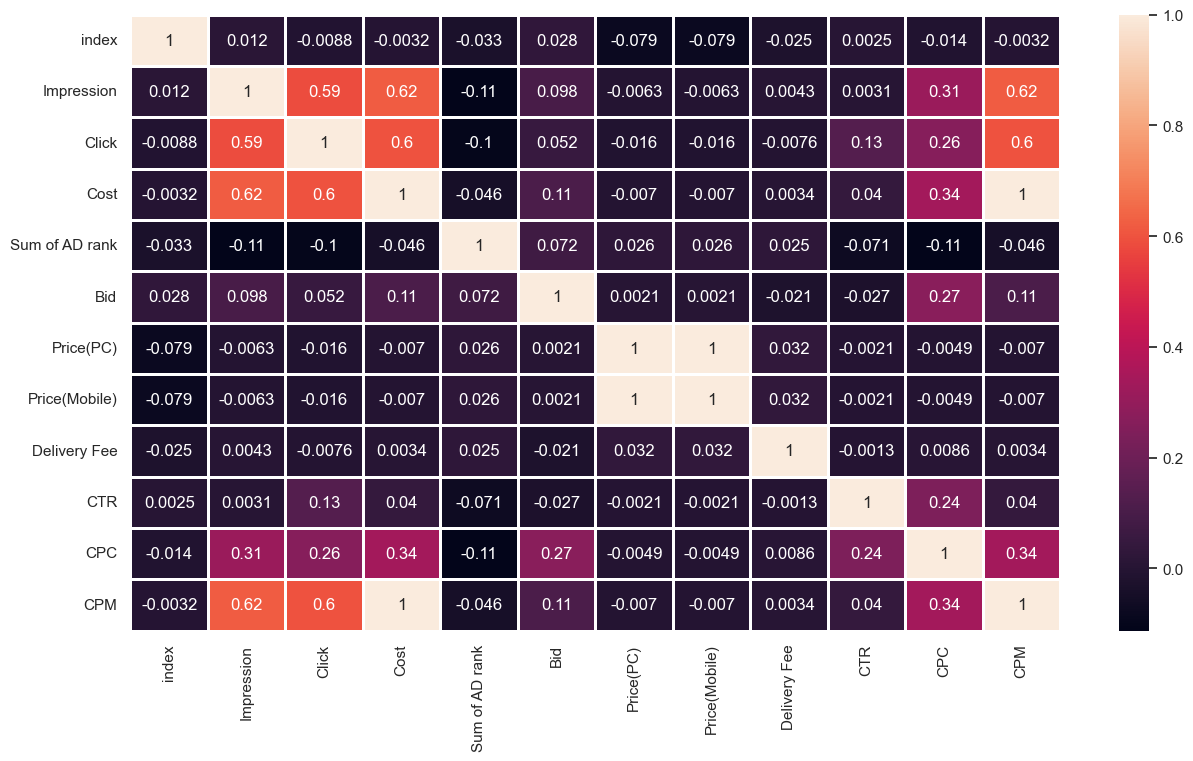

In [119]:
corr_heat(price_5_10)

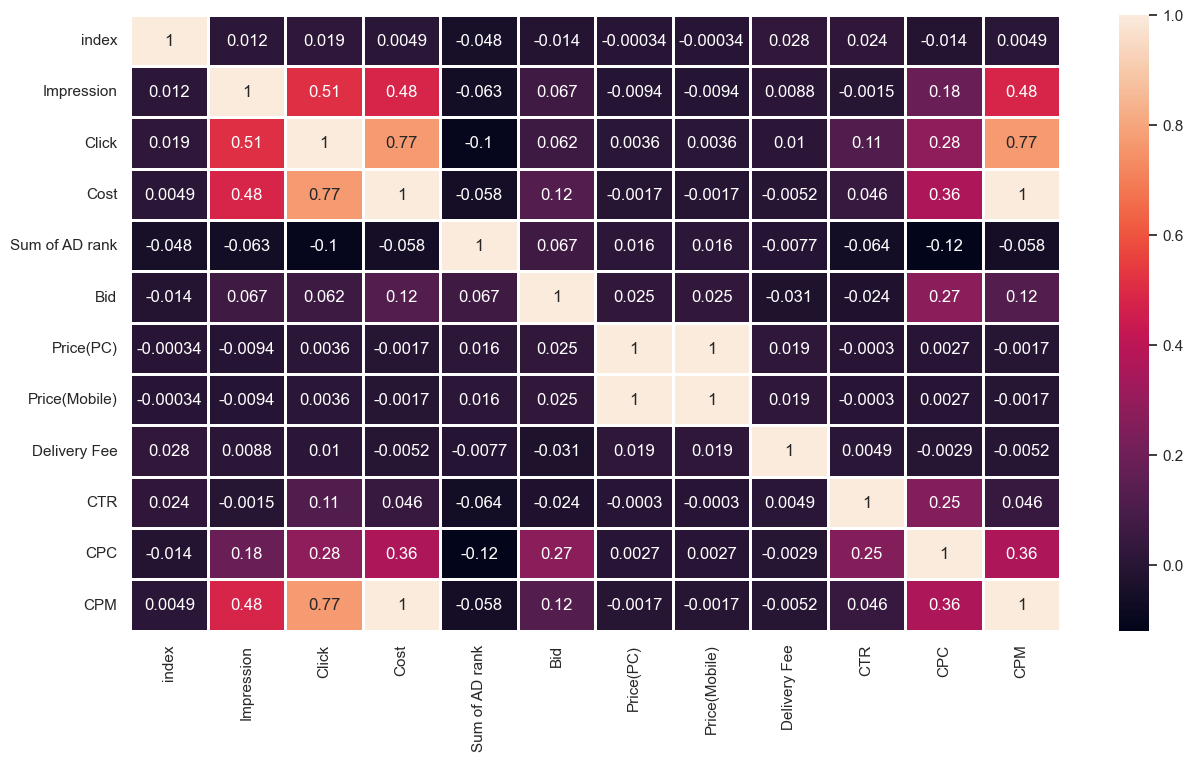

In [120]:
corr_heat(price_10_15)

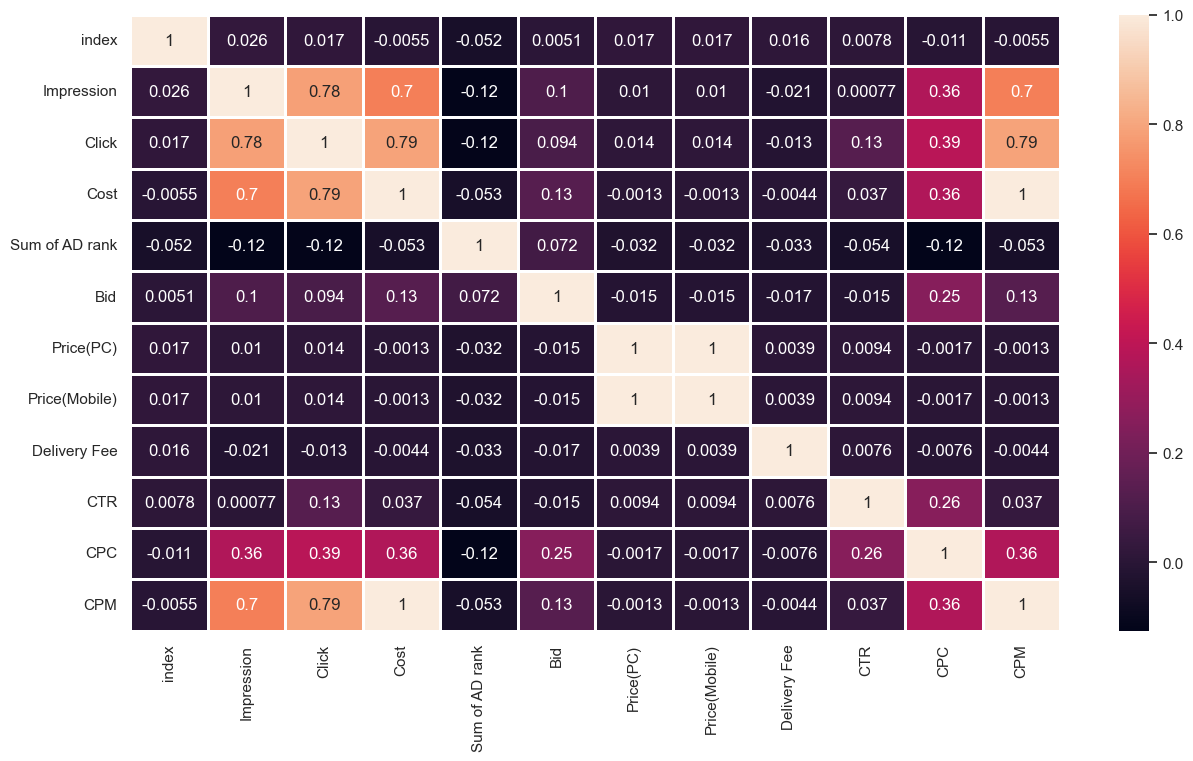

In [121]:
corr_heat(price_15_20)

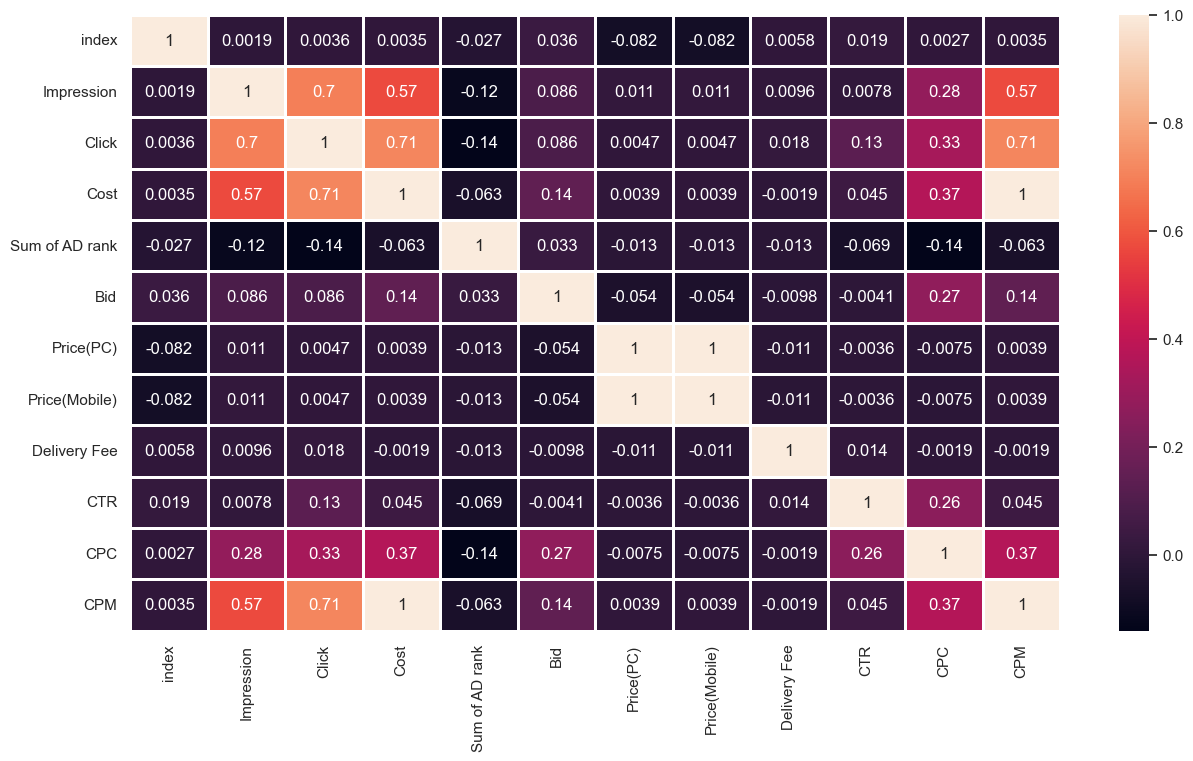

In [122]:
corr_heat(price_up_20)

## rank 구간별 
### 네이버 페이지 기본 default 40, 한페이지에 광고가 6개 상위3개 중간에3개(20개보기, 40개보기, 60개보기, 80개보기)
### log에서 얻은 인사이트로 윈도우가 압도적으로 많으니 윈도우 기준

In [123]:
bidding_drop_null

,index,Impression,Click,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,CTR,CPC,CPM
date,,,,,,,,,,,,,,,,
2022-10-31,3575092,3,0,0.0,3.0,50,165900,165900,0,가구/인테리어,침실가구,장롱/붙박이장,드레스룸,0.000000,0.0,0.00
2022-10-31,3575637,6,0,0.0,3.0,50,10900,10900,0,가구/인테리어,인테리어소품,아로마/캔들용품,아로마방향제/디퓨저,0.000000,0.0,0.00
2022-10-31,4129259,7,0,0.0,8.0,50,255000,255000,-1,가구/인테리어,거실가구,소파,패브릭소파,0.000000,0.0,0.00
2022-10-31,4131479,36,3,150.0,4.0,140,190000,190000,20000,가구/인테리어,아동/주니어가구,책상의자세트,null_cat4,8.333333,50.0,0.15
2022-10-31,4131482,224,0,0.0,6.0,50,129000,129000,0,가구/인테리어,아동/주니어가구,책상,null_cat4,0.000000,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-03,2566795,5,0,0.0,13.0,500,19900,19900,0,가구/인테리어,인테리어소품,아로마/캔들용품,아로마방향제/디퓨저,0.000000,0.0,0.00
2023-01-03,2566880,3,0,0.0,17.0,500,23900,23900,3000,생활/건강,문구/사무용품,이벤트/파티용품,데코용품,0.000000,0.0,0.00
2023-01-03,2566881,1,0,0.0,8.0,500,2500,2500,3000,가구/인테리어,인테리어소품,기타장식용품,null_cat4,0.000000,0.0,0.00


In [127]:
rank_down_26 = bidding_drop_null[bidding_drop_null['Sum of AD rank'] <= 26]

rank_26_46 = bidding_drop_null[(bidding_drop_null['Sum of AD rank'] > 26) & (bidding_drop_null['Sum of AD rank'] < 46)]

rank_46_66 = bidding_drop_null[(bidding_drop_null['Sum of AD rank'] > 46) & (bidding_drop_null['Sum of AD rank'] < 66)]

rank_66_86 = bidding_drop_null[(bidding_drop_null['Sum of AD rank'] > 66) & (bidding_drop_null['Sum of AD rank'] < 86)]

rank_up_86 = bidding_drop_null[bidding_drop_null['Sum of AD rank'] >= 86]

In [265]:
def rank_click(df):
    print(df['Click'].mean())
    print(df['Click'].median())
    print(df['Click'].describe())

In [266]:
def rank_imp(df):
    print(df['Impression'].mean())
    print(df['Impression'].median())
    print(df['Impression'].describe())

In [267]:
rank_click(rank_down_26)

0.790540585286385
0.0
count    1.208024e+06
mean     7.905406e-01
std      3.593399e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      4.740000e+02
Name: Click, dtype: float64


In [268]:
rank_click(rank_26_46)

0.06485917961902536
0.0
count    77013.000000
mean         0.064859
std          0.286856
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          6.000000
Name: Click, dtype: float64


In [269]:
rank_click(rank_46_66)

0.02757614164458271
0.0
count    26037.000000
mean         0.027576
std          0.171547
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          3.000000
Name: Click, dtype: float64


In [270]:
rank_click(rank_66_86)

0.009230488027782854
0.0
count    10942.000000
mean         0.009230
std          0.095635
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Click, dtype: float64


In [271]:
rank_click(rank_up_86)

0.0062317429406037
0.0
count    5135.000000
mean        0.006232
std         0.078703
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Click, dtype: float64


In [272]:
rank_imp(rank_down_26)

48.3159283259273
12.0
count    1.208024e+06
mean     4.831593e+01
std      3.610444e+02
min      1.000000e+00
25%      4.000000e+00
50%      1.200000e+01
75%      3.600000e+01
max      7.860700e+04
Name: Impression, dtype: float64


In [273]:
rank_imp(rank_26_46)

5.943671847610144
3.0
count    77013.000000
mean         5.943672
std         12.308657
min          1.000000
25%          2.000000
50%          3.000000
75%          6.000000
max        361.000000
Name: Impression, dtype: float64


In [274]:
rank_imp(rank_46_66)

3.1726005300149787
2.0
count    26037.000000
mean         3.172601
std          6.319575
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max        201.000000
Name: Impression, dtype: float64


In [275]:
rank_imp(rank_66_86)

1.949734966185341
1.0
count    10942.000000
mean         1.949735
std          3.583880
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        103.000000
Name: Impression, dtype: float64


In [276]:
rank_imp(rank_up_86)

1.3028237585199611
1.0
count    5135.000000
mean        1.302824
std         1.258095
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        37.000000
Name: Impression, dtype: float64


## rank 26이하와 26초과로 분석

In [147]:
bidding_drop_null

,index,Impression,Click,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,CTR,CPC,CPM
date,,,,,,,,,,,,,,,,
2022-10-31,3575092,3,0,0.0,3.0,50,165900,165900,0,가구/인테리어,침실가구,장롱/붙박이장,드레스룸,0.000000,0.0,0.00
2022-10-31,3575637,6,0,0.0,3.0,50,10900,10900,0,가구/인테리어,인테리어소품,아로마/캔들용품,아로마방향제/디퓨저,0.000000,0.0,0.00
2022-10-31,4129259,7,0,0.0,8.0,50,255000,255000,-1,가구/인테리어,거실가구,소파,패브릭소파,0.000000,0.0,0.00
2022-10-31,4131479,36,3,150.0,4.0,140,190000,190000,20000,가구/인테리어,아동/주니어가구,책상의자세트,null_cat4,8.333333,50.0,0.15
2022-10-31,4131482,224,0,0.0,6.0,50,129000,129000,0,가구/인테리어,아동/주니어가구,책상,null_cat4,0.000000,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-03,2566795,5,0,0.0,13.0,500,19900,19900,0,가구/인테리어,인테리어소품,아로마/캔들용품,아로마방향제/디퓨저,0.000000,0.0,0.00
2023-01-03,2566880,3,0,0.0,17.0,500,23900,23900,3000,생활/건강,문구/사무용품,이벤트/파티용품,데코용품,0.000000,0.0,0.00
2023-01-03,2566881,1,0,0.0,8.0,500,2500,2500,3000,가구/인테리어,인테리어소품,기타장식용품,null_cat4,0.000000,0.0,0.00


In [239]:
rank_down_7 = bidding_drop_null[bidding_drop_null['Sum of AD rank'] <= 7]
rank_down_26 = bidding_drop_null[bidding_drop_null['Sum of AD rank'] <= 26]
rank_up_26 = bidding_drop_null[bidding_drop_null['Sum of AD rank'] > 26]

In [253]:
def rank_Analysis(df):
        
    print('비용평균')
    print(df['Cost'].mean())
    print('-' * 50)
    print('\n')
    
    cost_non_zero = df[df['Cost'] != 0]
    
    
    print(f'코스트 썼을때 평균 순위 : {cost_non_zero["Sum of AD rank"].mean()}')

    cost_zero = df[df['Cost'] == 0]

    print(f'코스트 안 썼을때 평균 순위 : {cost_zero["Sum of AD rank"].mean()}')
    print('-' * 50)
    print('\n')
  

    print("광고숫자비율")
    print((len(list(set(df['index'].values))) / len(df))*100)
    print('-' * 50)
    print('\n')
    
    
    rank_del_zero = df[df['Delivery Fee'] <= 0]
    rank_del_non_zero = df[df['Delivery Fee'] > 0]
    print('배달비 없음 비율')
    print((rank_del_zero.shape[0] / df['Delivery Fee'].shape[0]*100))
    print('\n')
    print('배달비 있음 비율')
    print((rank_del_non_zero.shape[0] / df['Delivery Fee'].shape[0]*100))  
    print('-' * 50)
    print('\n')
    

    print('코스트비율')
    print(df['Cost'].value_counts(normalize=True))
    print('-' * 50)
    print('\n')
    
    plt.figure(figsize=(16, 6))
    plt.subplot(2, 1, 1)
    print('코스트')
    display(cost_non_zero['Cost'].describe())
    plt.hist(cost_non_zero['Cost'], bins=150)
    plt.title('cost_non_zero')
    plt.xticks(rotation=90)
    
    print('-' * 50)
    print('\n')
    
    
    plt.subplot(2, 1, 2)
    print('카테고리1')
    display(df['Category Name 1'].value_counts(normalize=True))
    sns.countplot(x=df['Category Name 1'], data=df)
    plt.title('Category Name 1')
    plt.xticks(rotation=90)
    

비용평균
295.6721806514001
--------------------------------------------------


코스트 썼을때 평균 순위 : 3.62562659972033
코스트 안 썼을때 평균 순위 : 4.045323442735004
--------------------------------------------------


광고숫자비율
6.262983342236196
--------------------------------------------------


배달비 없음 비율
64.56414332017447


배달비 있음 비율
35.435856679825534
--------------------------------------------------


코스트비율
0.0        0.645950
50.0       0.071722
100.0      0.027654
150.0      0.014646
200.0      0.010261
             ...   
18050.0    0.000001
55410.0    0.000001
44950.0    0.000001
44880.0    0.000001
10160.0    0.000001
Name: Cost, Length: 2381, dtype: float64
--------------------------------------------------


코스트


count    244574.000000
mean        835.113667
std        4043.521415
min          50.000000
25%         100.000000
50%         230.000000
75%         580.000000
max      325300.000000
Name: Cost, dtype: float64

--------------------------------------------------


카테고리1


가구/인테리어    0.694310
생활/건강      0.247353
출산/육아      0.024533
스포츠/레저     0.012416
화장품/미용     0.007564
디지털/가전     0.005643
패션잡화       0.005385
패션의류       0.001684
여가/생활편의    0.001003
식품         0.000109
Name: Category Name 1, dtype: float64

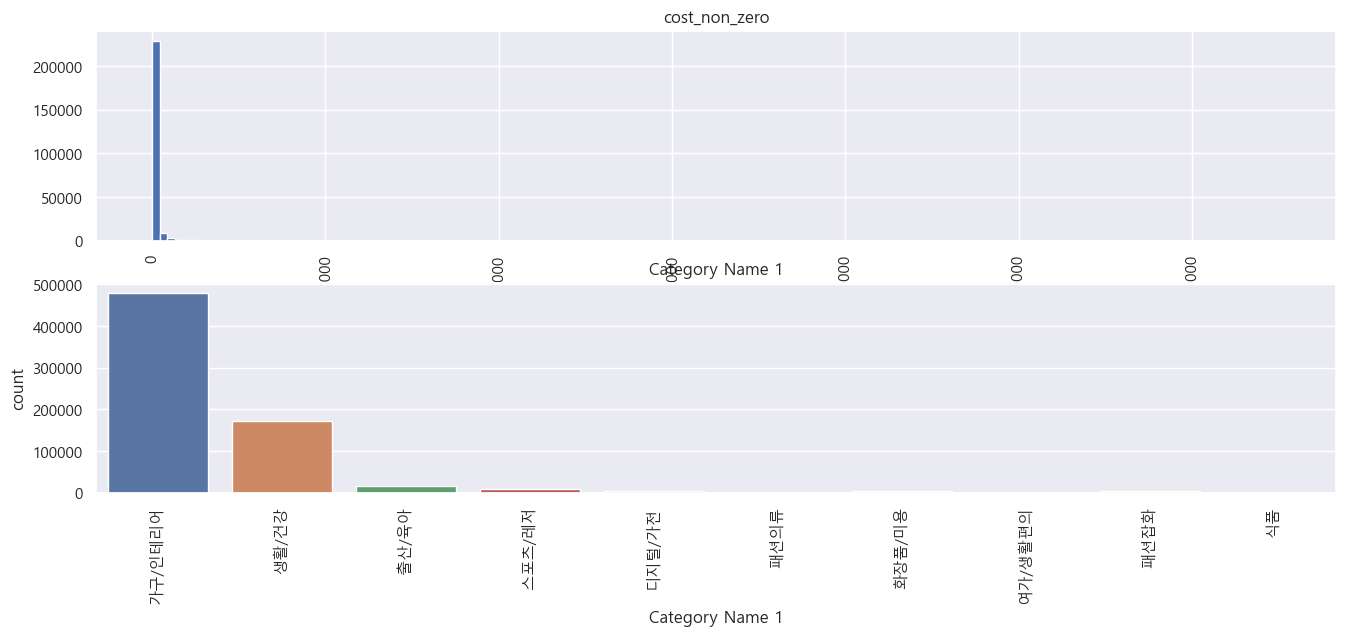

In [256]:
rank_Analysis(rank_down_7)

비용평균
197.78499433786084
--------------------------------------------------


코스트 썼을때 평균 순위 : 5.679798808393057
코스트 안 썼을때 평균 순위 : 8.780434871163534
--------------------------------------------------


광고숫자비율
3.965566909266703
--------------------------------------------------


배달비 없음 비율
65.05789620073773


배달비 있음 비율
34.94210379926226
--------------------------------------------------


코스트비율
0.0        7.315716e-01
50.0       5.392856e-02
100.0      1.859731e-02
150.0      9.850798e-03
200.0      7.199360e-03
               ...     
26190.0    8.277981e-07
42270.0    8.277981e-07
10720.0    8.277981e-07
46930.0    8.277981e-07
10160.0    8.277981e-07
Name: Cost, Length: 2406, dtype: float64
--------------------------------------------------


코스트


count    324268.000000
mean        736.825774
std        3541.933771
min          50.000000
25%         100.000000
50%         240.000000
75%         540.000000
max      325300.000000
Name: Cost, dtype: float64

--------------------------------------------------


카테고리1


가구/인테리어    0.715840
생활/건강      0.233250
출산/육아      0.020022
스포츠/레저     0.011914
화장품/미용     0.006022
패션잡화       0.005748
디지털/가전     0.004581
패션의류       0.001797
여가/생활편의    0.000659
식품         0.000166
Name: Category Name 1, dtype: float64

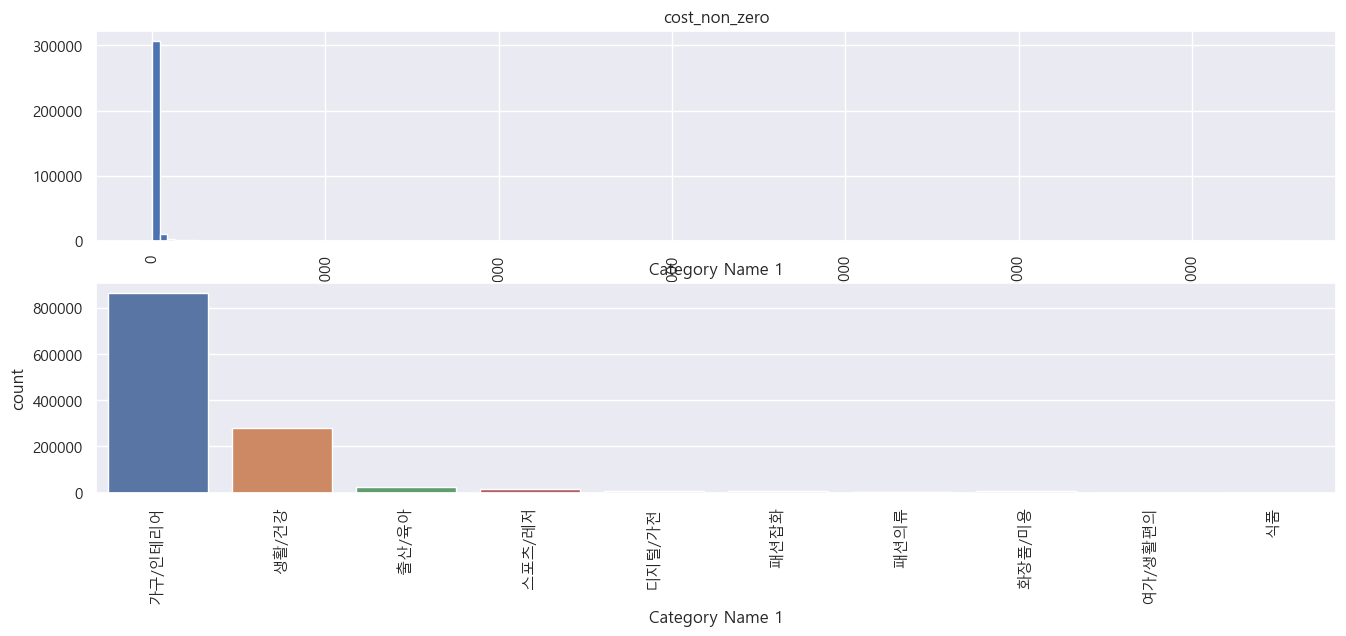

In [254]:
rank_Analysis(rank_down_26)

비용평균
13.74812277269517
--------------------------------------------------


코스트 썼을때 평균 순위 : 36.91611687087653
코스트 안 썼을때 평균 순위 : 45.574235252201355
--------------------------------------------------


광고숫자비율
18.159383701202238
--------------------------------------------------


배달비 없음 비율
58.151428316299615


배달비 있음 비율
41.84857168370039
--------------------------------------------------


코스트비율
0.0       0.956935
50.0      0.006486
350.0     0.002362
250.0     0.001518
180.0     0.001388
            ...   
2270.0    0.000008
1090.0    0.000008
1420.0    0.000008
1340.0    0.000008
1890.0    0.000008
Name: Cost, Length: 164, dtype: float64
--------------------------------------------------


코스트


count    5305.000000
mean      319.244109
std       295.150749
min        50.000000
25%       130.000000
50%       260.000000
75%       400.000000
max      3860.000000
Name: Cost, dtype: float64

--------------------------------------------------


카테고리1


가구/인테리어    0.723656
생활/건강      0.245456
스포츠/레저     0.012850
패션잡화       0.006851
출산/육아      0.006251
디지털/가전     0.001624
화장품/미용     0.001591
패션의류       0.001299
여가/생활편의    0.000341
식품         0.000081
Name: Category Name 1, dtype: float64

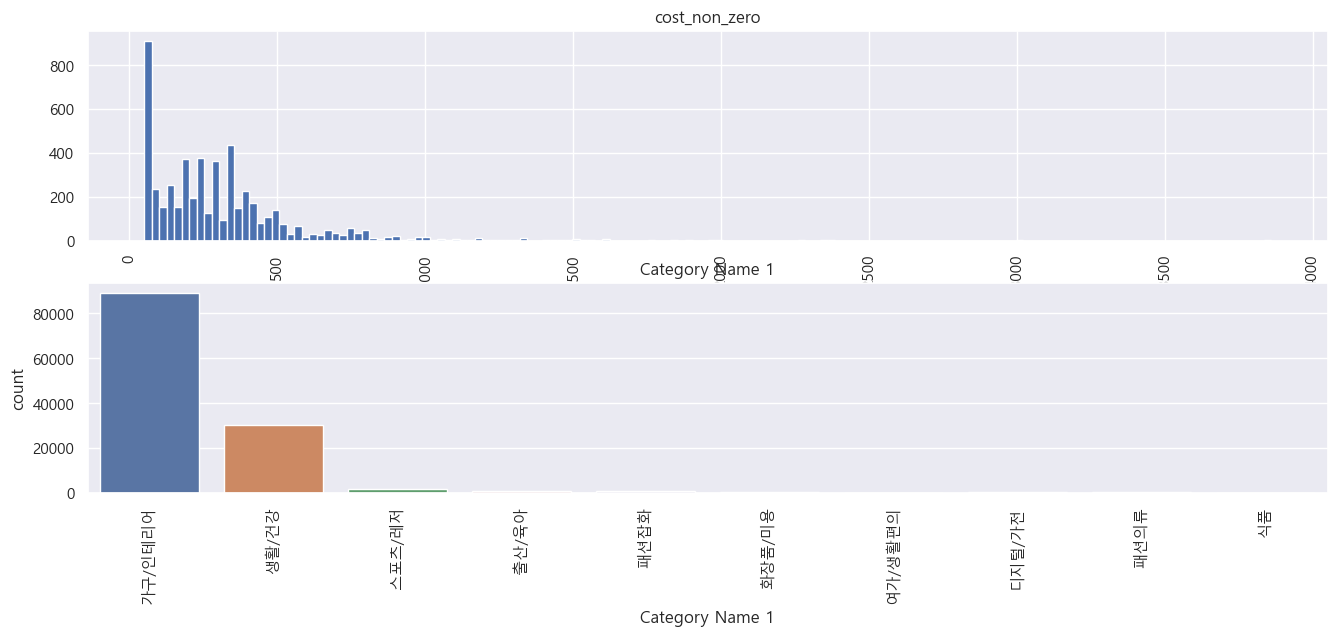

In [255]:
rank_Analysis(rank_up_26)

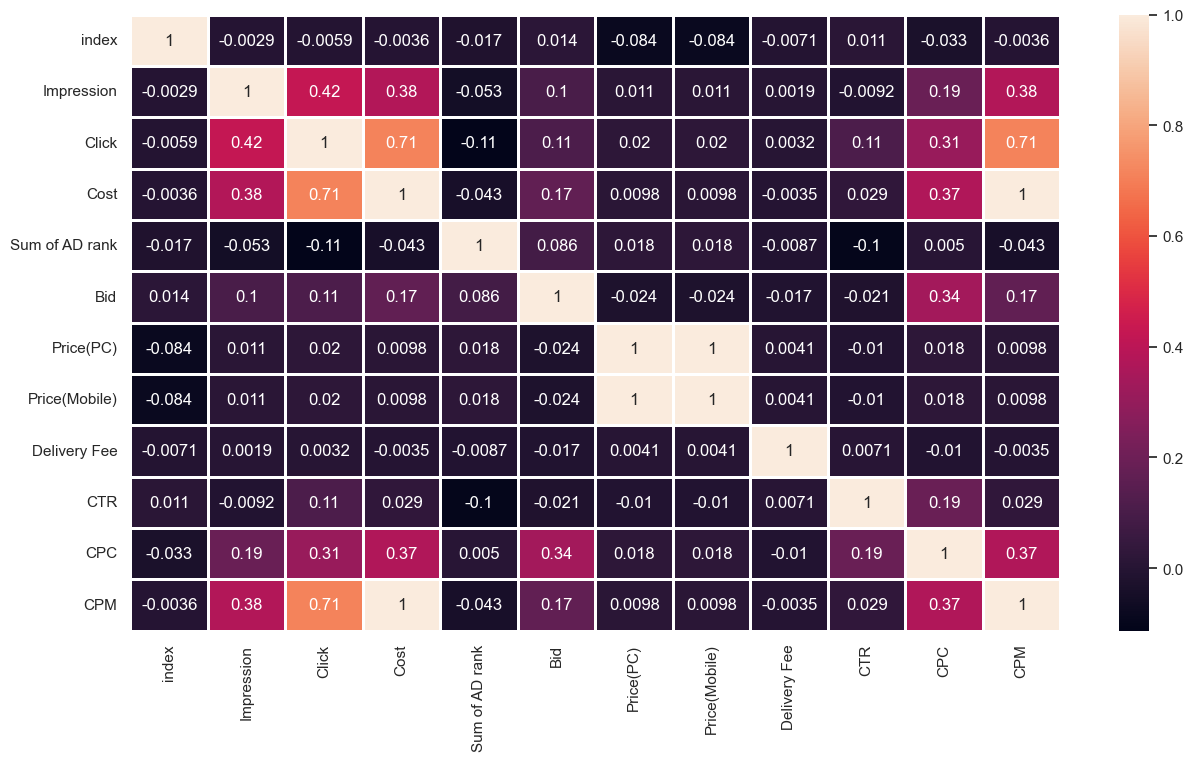

In [257]:
corr_heat(rank_down_7)

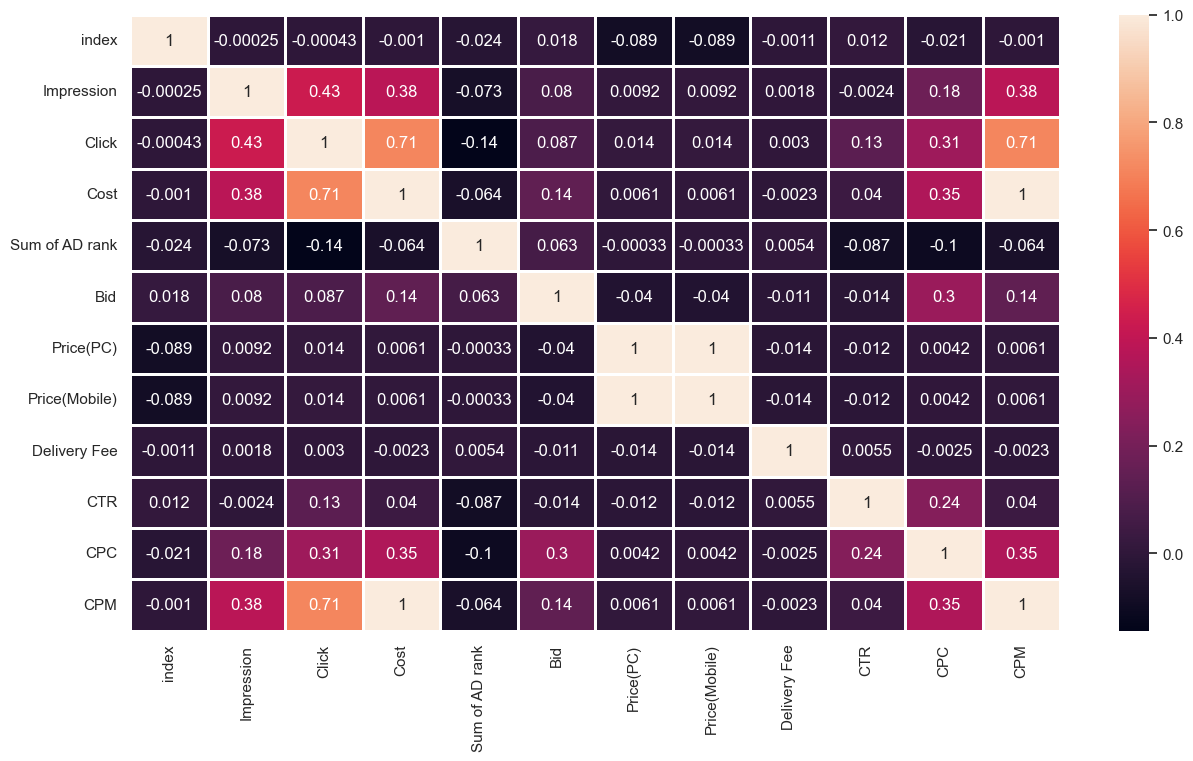

In [258]:
corr_heat(rank_down_26)

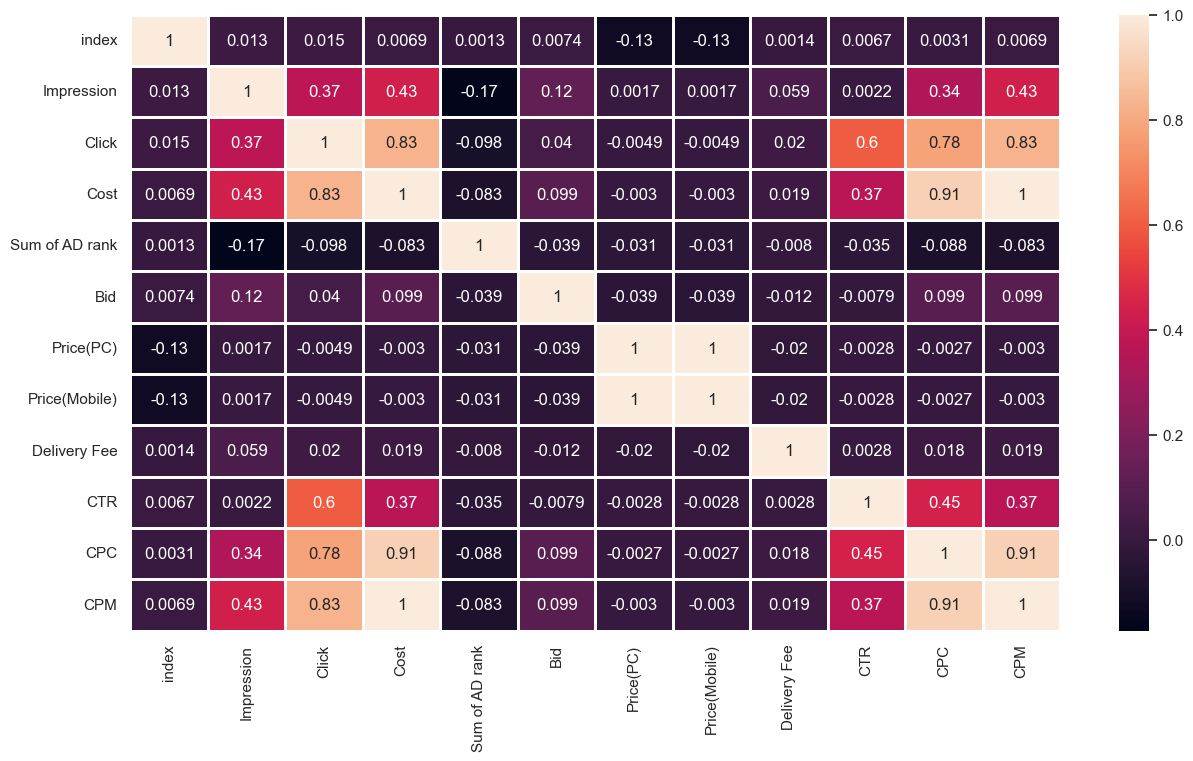

In [259]:
corr_heat(rank_up_26)

## 카테고리 1별 분석

In [277]:
bidding_drop_null

,index,Impression,Click,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,CTR,CPC,CPM
date,,,,,,,,,,,,,,,,
2022-10-31,3575092,3,0,0.0,3.0,50,165900,165900,0,가구/인테리어,침실가구,장롱/붙박이장,드레스룸,0.000000,0.0,0.00
2022-10-31,3575637,6,0,0.0,3.0,50,10900,10900,0,가구/인테리어,인테리어소품,아로마/캔들용품,아로마방향제/디퓨저,0.000000,0.0,0.00
2022-10-31,4129259,7,0,0.0,8.0,50,255000,255000,-1,가구/인테리어,거실가구,소파,패브릭소파,0.000000,0.0,0.00
2022-10-31,4131479,36,3,150.0,4.0,140,190000,190000,20000,가구/인테리어,아동/주니어가구,책상의자세트,null_cat4,8.333333,50.0,0.15
2022-10-31,4131482,224,0,0.0,6.0,50,129000,129000,0,가구/인테리어,아동/주니어가구,책상,null_cat4,0.000000,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-03,2566795,5,0,0.0,13.0,500,19900,19900,0,가구/인테리어,인테리어소품,아로마/캔들용품,아로마방향제/디퓨저,0.000000,0.0,0.00
2023-01-03,2566880,3,0,0.0,17.0,500,23900,23900,3000,생활/건강,문구/사무용품,이벤트/파티용품,데코용품,0.000000,0.0,0.00
2023-01-03,2566881,1,0,0.0,8.0,500,2500,2500,3000,가구/인테리어,인테리어소품,기타장식용품,null_cat4,0.000000,0.0,0.00


In [ ]:
cat_col = ['Click', 'Cost', 'Sum of AD rank', 'Impression']

In [284]:
cat_val = list(set(bidding_drop_null['Category Name 1'].values))
cat_val

['식품',
 '스포츠/레저',
 '출산/육아',
 '패션의류',
 '생활/건강',
 '디지털/가전',
 '가구/인테리어',
 '화장품/미용',
 '패션잡화',
 '여가/생활편의']

In [288]:
cat_val_1 = bidding_drop_null[bidding_drop_null['Category Name 1'].isin(['식품'])]
cat_val_2 = bidding_drop_null[bidding_drop_null['Category Name 1'].isin(['스포츠/레저'])]
cat_val_3 = bidding_drop_null[bidding_drop_null['Category Name 1'].isin(['출산/육아'])]
cat_val_4 = bidding_drop_null[bidding_drop_null['Category Name 1'].isin(['패션의류'])]
cat_val_5 = bidding_drop_null[bidding_drop_null['Category Name 1'].isin(['생활/건강'])]
cat_val_6 = bidding_drop_null[bidding_drop_null['Category Name 1'].isin(['디지털/가전'])]
cat_val_7 = bidding_drop_null[bidding_drop_null['Category Name 1'].isin(['가구/인테리어'])]
cat_val_8 = bidding_drop_null[bidding_drop_null['Category Name 1'].isin(['화장품/미용'])]
cat_val_9 = bidding_drop_null[bidding_drop_null['Category Name 1'].isin(['패션잡화'])]
cat_val_10 = bidding_drop_null[bidding_drop_null['Category Name 1'].isin(['여가/생활편의'])]

In [358]:
def cat_val(df):
    
    print(f'광고비율 : {(len(list(set(df["index"].values))) / len(df))*100}')
    print('-' * 50)
    cat_col = ['Click', 'Cost', 'Sum of AD rank', 'Impression']
    
    for col in cat_col:
        print(f'{col} 평균 : {df[col].mean()}')
        print('-' * 50)
#         print(df[col].value_counts(normalize=True))
#         print('-' * 50)
# #         plt.figure(figsize=(16, 6))
#         plt.hist(df[col], bins=20)
#         plt.title(col)
#         plt.xticks(rotation=90)

In [359]:
cat_val(cat_val_1)

광고비율 : 3.8095238095238098
--------------------------------------------------
Click 평균 : 0.11428571428571428
--------------------------------------------------
Cost 평균 : 9.428571428571429
--------------------------------------------------
Sum of AD rank 평균 : 10.471428571428572
--------------------------------------------------
Impression 평균 : 28.714285714285715
--------------------------------------------------


In [360]:
cat_val(cat_val_2)

광고비율 : 3.5302954431647473
--------------------------------------------------
Click 평균 : 1.2496244366549825
--------------------------------------------------
Cost 평균 : 195.1583625438157
--------------------------------------------------
Sum of AD rank 평균 : 11.489672008012018
--------------------------------------------------
Impression 평균 : 60.6691912869304
--------------------------------------------------


In [361]:
cat_val(cat_val_3)

광고비율 : 3.73041631606363
--------------------------------------------------
Click 평균 : 2.120126617782586
--------------------------------------------------
Cost 평균 : 293.0640702007453
--------------------------------------------------
Sum of AD rank 평균 : 7.401570701606763
--------------------------------------------------
Impression 평균 : 76.07284529390552
--------------------------------------------------


In [362]:
cat_val(cat_val_4)

광고비율 : 5.105105105105105
--------------------------------------------------
Click 평균 : 1.0574860574860574
--------------------------------------------------
Cost 평균 : 347.4517374517375
--------------------------------------------------
Sum of AD rank 평균 : 10.658086658086658
--------------------------------------------------
Impression 평균 : 51.65079365079365
--------------------------------------------------


In [363]:
cat_val(cat_val_5)

광고비율 : 3.749891830043364
--------------------------------------------------
Click 평균 : 0.8705069405049213
--------------------------------------------------
Cost 평균 : 201.73228977369243
--------------------------------------------------
Sum of AD rank 평균 : 11.249153069302489
--------------------------------------------------
Impression 평균 : 45.09755808326042
--------------------------------------------------


In [364]:
cat_val(cat_val_6)

광고비율 : 3.2089291942797344
--------------------------------------------------
Click 평균 : 1.8022322985699337
--------------------------------------------------
Cost 평균 : 224.66515521450995
--------------------------------------------------
Sum of AD rank 평균 : 7.635158702476456
--------------------------------------------------
Impression 평균 : 103.64980816184165
--------------------------------------------------


In [365]:
cat_val(cat_val_7)

광고비율 : 3.608356038440209
--------------------------------------------------
Click 평균 : 0.6170970241021829
--------------------------------------------------
Cost 평균 : 169.478654403987
--------------------------------------------------
Sum of AD rank 평균 : 11.599969388728553
--------------------------------------------------
Impression 평균 : 42.463696814226275
--------------------------------------------------


In [366]:
cat_val(cat_val_8)

광고비율 : 4.028911792263418
--------------------------------------------------
Click 평균 : 0.8403158881006558
--------------------------------------------------
Cost 평균 : 183.20706732699773
--------------------------------------------------
Sum of AD rank 평균 : 7.184044973899076
--------------------------------------------------
Impression 평균 : 43.57836969615848
--------------------------------------------------


In [367]:
cat_val(cat_val_9)

광고비율 : 3.4797123780174624
--------------------------------------------------
Click 평균 : 0.9188495120698511
--------------------------------------------------
Cost 평균 : 254.64432460195172
--------------------------------------------------
Sum of AD rank 평균 : 12.362480739599384
--------------------------------------------------
Impression 평균 : 45.43888032871084
--------------------------------------------------


In [368]:
cat_val(cat_val_10)

광고비율 : 3.221957040572793
--------------------------------------------------
Click 평균 : 1.8711217183770883
--------------------------------------------------
Cost 평균 : 156.6348448687351
--------------------------------------------------
Sum of AD rank 평균 : 6.794749403341289
--------------------------------------------------
Impression 평균 : 122.70167064439141
--------------------------------------------------
